# AULA 1


In [2]:
import pandas as pd

In [3]:
# lendo base csv
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [5]:
# informa as colunas e os tipos de dados do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
# Descrição aprofundada (mesmo q SQL) - porém só pegou as colunas numéricas, pois ele traz contagens (total, média, máximo, mínimo, desvio padrão)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
# por não ser uma função, não precisa de parênteses
#Tupla (valores dentro dos parênteses), mostra quantos valores e quantas colunas temos no arquivo
df.shape

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas: ", linhas)
print("Colunas: ", colunas)

Linhas:  133349
Colunas:  11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
colunas_traduzidas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação e atribuindo o resultado de volta a df
df.rename(columns=colunas_traduzidas, inplace=True)

# Verificando resultado
df.head()

## se não atualizar, rodar df.colums de novo e alterar os nomes iniciais aqui!


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [11]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()


,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [15]:
df["contrato"].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [16]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [17]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [18]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [20]:
# exibe a qtd de categorias únicas e a mais frequente
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


#### perguntas q podem ser respondidas com a análise acima:

1. Qual o nível de experiência mais comum na base de dados?
2. Qual é o tipo de contrato mais frequente?
3. Qual o cargo mais frequente na amostra?
4. De qual país são a maioria dos profissionais da base?
5. Qual é o país onde mais empresas da amostra estão sediadas?
6. Qual o regime de trabalho mais comum?
7. Qual é o tamanho mais comum das empresas na amostra?

# AULA 2 - Limpeza e Preparação de dados

In [21]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [23]:
df.isnull().sum()

# 10 células dentro de ano estão nulas

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [24]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
df[df.isnull().any(axis=1)]
#Trouxe todas as linhas q possuem ano nulo (Not a Number - NaN)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [26]:
#Criando um novo dataframe de teste

import numpy as np

df_pontos = pd.DataFrame({
    'nome': ["Hermione", "Ronald", "Harry", "Luna", "Draco", "Cho"],
    'pontos': [7000, np.nan, 4000, 4000, np.nan, 50000],
    'casa': ["Gryffindor", "Gryffindor", "Gryffindor", "Ravenclaw", "Slytherin", "Ravenclaw"]
})

# o df se repete vária vezes pq estamos colocando várias funções juntas. A base pontos, recebe no campo pontos a média e o tratamento de nulos
######## fillna = Preencher valores nulos com um valor específico

# média
df_pontos['pontos_media'] = df_pontos['pontos'].fillna(df_pontos['pontos'].mean().round(2))
# mediana
df_pontos['pontos_mediana'] = df_pontos['pontos'].fillna(df_pontos['pontos'].median())
df_pontos


,nome,pontos,casa,pontos_media,pontos_mediana
0,Hermione,7000.0,Gryffindor,7000.0,7000.0
1,Ronald,NaN,Gryffindor,16250.0,5500.0
2,Harry,4000.0,Gryffindor,4000.0,4000.0
3,Luna,4000.0,Ravenclaw,4000.0,4000.0
4,Draco,NaN,Slytherin,16250.0,5500.0
5,Cho,50000.0,Ravenclaw,50000.0,50000.0


In [27]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"],
    "Temperatura": [30, np.nan, np.nan, 21, 28, 25, np.nan],
})

#ffill vai completar o nulo com o valor anterior
df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,21.0,21.0
4,Sexta,28.0,28.0
5,Sábado,25.0,25.0
6,Domingo,NaN,25.0


In [28]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"],
    "Temperatura": [30, np.nan, np.nan, 21, 28, 25, np.nan],
})

#ffill vai completar o nulo com o valor posterior - vide ex quando o nulo está na última posição
df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,21.0
2,Quarta,NaN,21.0
3,Quinta,21.0,21.0
4,Sexta,28.0,28.0
5,Sábado,25.0,25.0
6,Domingo,NaN,NaN


In [29]:
import numpy as np

df_cidades = pd.DataFrame({
    'nome': ["Hermione", "Ronald", "Harry", "Luna"],
    "cidade": ["São Paulo", "A Toca", np.nan, "Alto da Colina"]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Hermione,São Paulo,São Paulo
1,Ronald,A Toca,A Toca
2,Harry,NaN,Não Informado
3,Luna,Alto da Colina,Alto da Colina


In [30]:
df_limpo = df.dropna()

In [31]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [32]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [33]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
#convertendo o tipo sem alterar os valores em ano
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# AULA 3 - Visualização de Dados

In [37]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


#### Plotando com Pandas

<Axes: title={'center': 'Senioridade'}, xlabel='senioridade'>

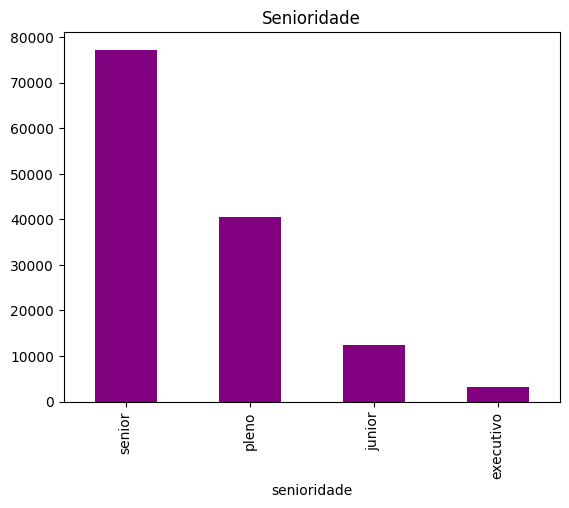

In [44]:
df_limpo['senioridade'].value_counts().plot(kind='bar', color='purple', title= 'Senioridade')

### Plotando com Seaborn

In [45]:
# aqui pode colocar estatísticas e mais opções q o Pandas não consegue
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

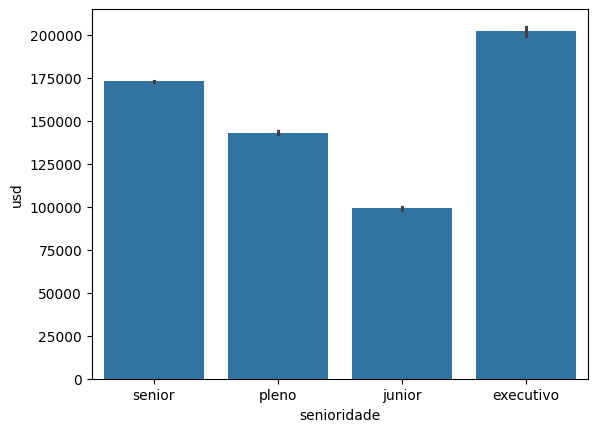

In [46]:
sns.barplot(data = df_limpo, x= 'senioridade', y= 'usd')

#executivo está grande, pq a maioria é C Level.

### Matplot para usar em conjunto

In [47]:
import matplotlib.pyplot as plt

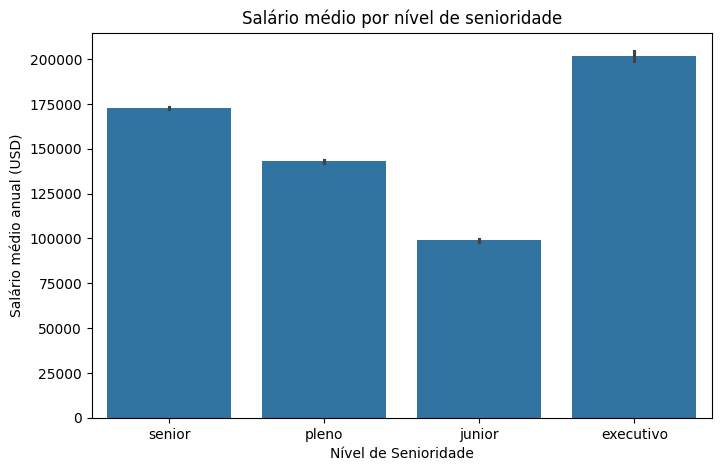

In [49]:
# Vamos usar em conjunto com as demais bibliotecas
plt.figure(figsize=(8, 5))
sns.barplot(data = df_limpo, x= 'senioridade', y= 'usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de Senioridade')    #label = rótulo
plt.ylabel('Salário médio anual (USD)')
plt.show()    # quando usa o show, não aparece o texto acima do gráfico <Axes: xlabel='senioridade', ylabel='usd'>

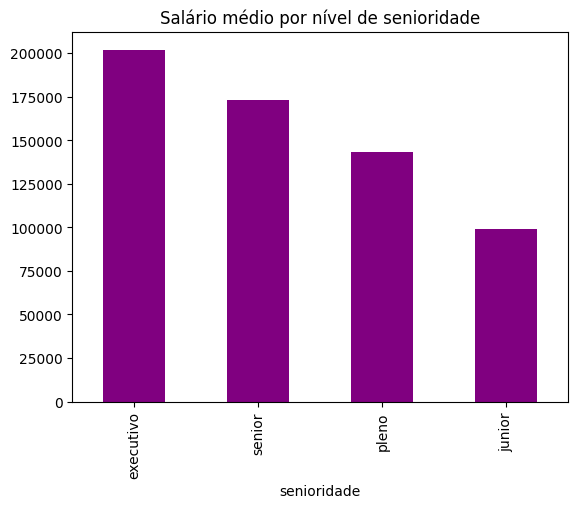

In [51]:
# função group by do Pandas sendo usada em conjunto
# sort_values para ordenação
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).plot(kind='bar', color='purple', title= 'Salário médio por nível de senioridade')
plt.show()

In [54]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

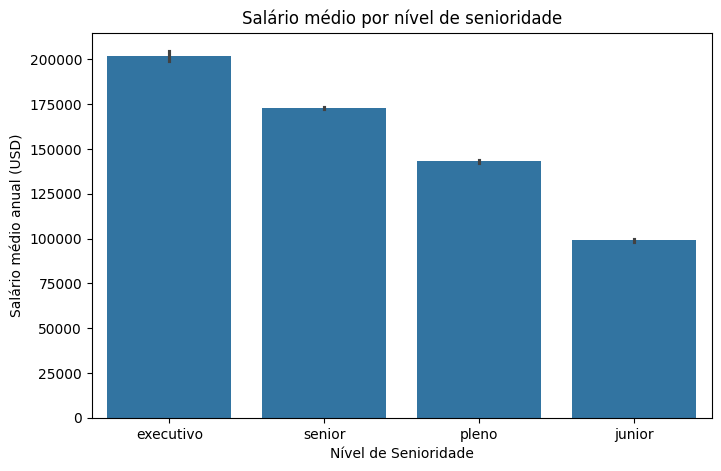

In [58]:
# Vamos usar em conjunto com as demais bibliotecas
plt.figure(figsize=(8, 5))
sns.barplot(data= df_limpo, x= 'senioridade', y= 'usd', order= ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

#### Verificação da distribuição salarial

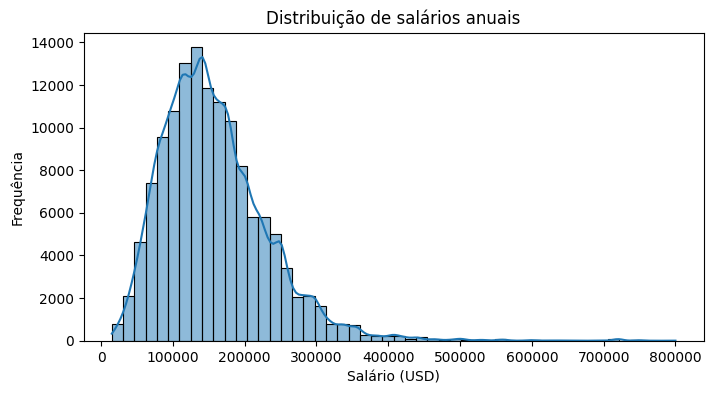

In [67]:
plt.figure(figsize=(8, 4))
## usando HISTOGRAMA via Seaborn
sns.histplot(df_limpo['usd'], bins= 50, kde=True)
plt.title('Distribuição de salários anuais')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

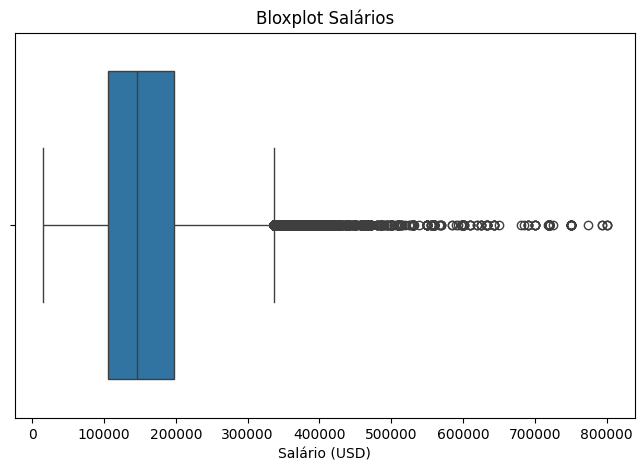

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= df_limpo ['usd'])
plt.title('Bloxplot Salários')
plt.xlabel('Salário (USD)')
plt.show()

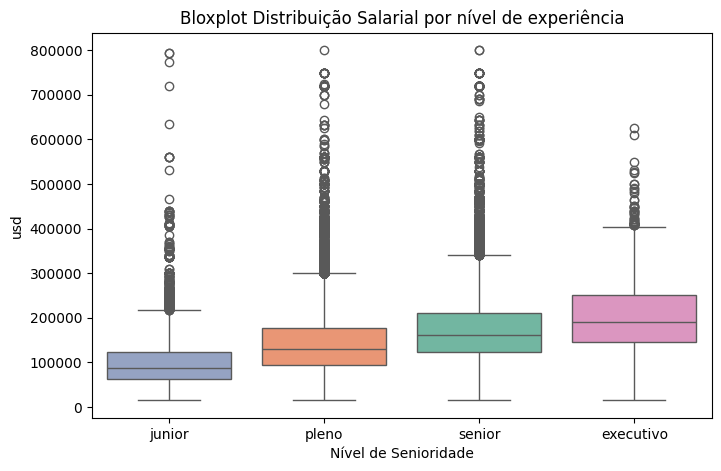

In [73]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x= df_limpo ['senioridade'], y= df_limpo ['usd'], data= df_limpo, order= ordem_senioridade, palette= 'Set2', hue= 'senioridade')  # para funcionar a cor/pallete, nprecisa do hue
plt.title('Bloxplot Distribuição Salarial por nível de experiência')
plt.xlabel('Nível de Senioridade')
plt.show()

In [74]:
import plotly.express as px

In [75]:
# Calculando a média salarial por senioridade
media_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Criando o gráfico de barras com Plotly Express
fig = px.bar(media_senioridade,
             x='senioridade',
             y='usd',
             title='Média Salarial por Nível de Senioridade (USD)',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio (USD)'},
             color='senioridade',
             category_orders={"senioridade": ["junior", "pleno", "senior", "executivo"]})

fig.show()

#se passar o mouse por cima, vai aparecer as informações

#### gráfico interativo, basta clicar na legenda

In [81]:
remoto_contagem= df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

#px.pie para gráfico de pizza/torta
fig= px.pie(remoto_contagem,
            names= 'tipo_trabalho',
            values= 'quantidade',
            title=  'Proporção dos tipos de salários',
            hole= 0.5,    #hole = buraco para gráfico de Rosca
            color_discrete_sequence= px.colors.sequential.RdBu
)

fig.update_traces(textinfo='percent+label')   # para mostrar as infos dos eixos
fig.show()